# ML - Data Analysis Report (Regression part)

## Step 0: Data  Preparation

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import gc
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
os.getcwd()
# KNN model - LOOCV for each of the 5 drugs
from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [3]:
#import the raw data
df = pd.read_csv("DREAM_data_T.csv", index_col=0)
df.shape
#标签
label1 = df.iloc[:, 0]
label2 = df.iloc[:, 1]
label3 = df.iloc[:, 2]
label4 = df.iloc[:, 3]
label5 = df.iloc[:, 4]
#feature
data = df.iloc[:, 5:]

#Everolimus(mTOR)
data1 = pd.concat([data, label1], axis=1)
data1 = data1[data1['Everolimus(mTOR)'].notnull()] # remove null

data2 = pd.concat([data, label2], axis=1)
data2 = data2[data2['Disulfiram(ALDH2)'].notnull()] # remove null

data3 = pd.concat([data, label3], axis=1)
data3 = data3[data3['Methylglyoxol(Pyruvate)'].notnull()] # remove null

data4 = pd.concat([data, label4], axis=1)
data4 = data4[data4['Mebendazole(Tubulin)'].notnull()] # remove null

data5 = pd.concat([data, label5], axis=1)
data5 = data5[data5['4-HC(DNA alkylator)'].notnull()] # remove null

from sklearn.model_selection import train_test_split
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data1[data.columns], data1['Everolimus(mTOR)'], test_size=0.2, random_state=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data2[data.columns], data2['Disulfiram(ALDH2)'], test_size=0.2, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data3[data.columns], data3['Methylglyoxol(Pyruvate)'], test_size=0.2, random_state=1)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data4[data.columns], data4['Mebendazole(Tubulin)'], test_size=0.2, random_state=1)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data5[data.columns], data5['4-HC(DNA alkylator)'], test_size=0.2, random_state=1)

Train = [X_train_0, X_train_1, X_train_2, X_train_3, X_train_4]
Test = [X_test_0, X_test_1, X_test_2, X_test_3, X_test_4]
Ytrain = [y_train_0, y_train_1, y_train_2, y_train_3, y_train_4]
Ytest = [y_test_0, y_test_1, y_test_2, y_test_3, y_test_4]

cls = ['Everolimus(mTOR)', 'Disulfiram(ALDH2)', 'Methylglyoxol(Pyruvate)', 'Mebendazole(Tubulin)', '4-HC(DNA alkylator)']


In [33]:
df.head()

,Everolimus(mTOR),Disulfiram(ALDH2),Methylglyoxol(Pyruvate),Mebendazole(Tubulin),4-HC(DNA alkylator),C9orf152,ELMO2,RPS11,CREB3L1,PNMA1,MMP2,C10orf90,ERCC5,ZHX3,GPR98,RXFP3,APBB2,KLHL13,PRO0478,KRTAP10-8,PRSSL1,PDCL3,DECR1,SALL1,CADM4,RPS18,SLC10A7,HNRPD,CFHR5,OR2K2,LMAN1,SUHW1,CHD8,SUMO1,GP1BA,DDB1,MYO9B,MMP7,CRNKL1,C9orf45,...,SLC10A3,RNF6,VAV1,ZNF383,PDGFC,ARMCX2,PEPD,MGC42105,LSDP5,ZNF358,EIF2C4,RPS6KA3,PHF21A,FAM49B,PNPLA2,ERCC2,EAF2,VPS13B,C14orf101,ST18,PSMB9,CDC2L2,LOC552889,ProSAPiP1,ADRBK2,TMEM16F,HCLS1,GPR15,CSF2,SLC2A11,GRIP2,GOLGA8B,GPLD1,RAB8A,RXFP2,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
184B5,0.0,0.0,NaN,NaN,NaN,3.613030,7.205940,10.476276,5.565989,7.664038,5.108659,4.128089,7.263226,5.742329,3.671584,7.093982,9.376873,5.657419,3.880879,6.228665,6.806391,6.952525,6.720257,5.581391,6.277985,9.444599,5.247289,8.000101,3.132989,2.856346,8.533931,3.777175,7.161848,6.225228,5.812903,11.216950,7.523679,3.096805,6.465164,4.449510,...,7.952436,6.868446,5.089733,6.503627,6.629928,4.195803,8.491622,5.035178,5.888633,7.512601,5.114197,6.968613,6.873017,8.014289,8.774098,7.704718,3.972970,6.650732,6.511144,3.869717,5.654239,6.650718,7.586672,6.895284,6.381522,7.815157,5.055345,4.059470,5.343562,6.431216,6.164306,4.648155,3.741650,8.103385,3.035962,5.094983,8.347877,9.560331,8.014001,5.611784
600MPE,0.0,1.0,0.0,0.0,0.0,8.463736,7.959597,9.939852,9.835957,7.645439,4.611590,3.687597,7.450175,5.199320,5.755408,6.345705,10.017518,3.180616,4.063729,6.471038,6.001389,7.167685,6.348149,5.121534,7.762984,8.781776,6.112648,7.702046,3.015299,3.570406,9.419990,4.032065,7.666402,7.210473,5.337184,9.494901,7.834618,2.688328,6.718855,6.413447,...,7.762261,7.015845,6.163415,5.781714,6.237560,6.817371,9.508047,3.972103,5.476897,7.989394,6.577076,7.184826,7.122768,8.548158,9.175756,7.658022,4.434776,6.719337,6.604309,3.580844,6.940111,6.553142,6.969001,6.179832,6.064049,8.379229,4.474942,4.032962,4.907346,6.703061,5.716731,5.082299,3.848673,9.345093,3.042711,5.838762,8.134302,9.230374,5.489988,5.135123
AU565,NaN,1.0,1.0,1.0,1.0,7.935823,8.073369,9.817430,5.696639,7.761882,4.765150,3.883901,7.204121,5.477589,6.198794,6.695064,6.910170,5.690865,4.529450,6.386481,6.110403,7.602553,7.921785,5.217590,6.824343,9.466783,6.454138,7.690468,3.075257,2.530425,9.361927,4.176434,8.234820,6.803690,5.481520,10.908749,7.914988,2.577650,6.889802,5.684133,...,8.649323,6.684087,6.894525,5.590677,5.220823,4.372183,8.941313,4.785493,5.347952,6.182794,6.091334,6.744675,6.932123,8.529096,9.449834,8.014596,4.365042,6.610416,5.877633,3.713258,6.355344,7.006982,7.202150,6.449025,3.917958,8.127113,5.180821,4.122877,5.036430,6.934501,6.133836,4.844242,4.605217,9.343916,2.862658,5.259975,8.465382,8.702158,6.926434,5.309263
BT20,NaN,1.0,NaN,0.0,1.0,3.098928,8.164778,10.038500,4.972852,7.766212,4.657057,3.848230,7.758748,5.764572,3.560379,6.472433,6.895399,3.372685,4.559631,6.138568,6.042250,7.737327,4.651722,5.090239,6.018851,9.322412,5.124867,7.687799,2.754957,3.567955,7.754735,4.450982,7.298406,8.051707,5.033587,9.997957,8.532906,2.909542,6.019398,5.061864,...,8.976872,7.408347,6.616296,6.552742,5.880291,4.855058,9.852804,4.705179,5.646852,8.143799,5.037034,6.704961,6.728076,8.554772,8.831700,8.370238,4.954091,6.702379,6.102985,3.515404,7.334150,7.027666,7.005746,6.365539,3.802361,8.721536,4.724511,3.015811,5.157336,6.387878,5.777977,5.019017,3.948915,9.465953,2.781718,4.581164,8.861059,6.829949,6.706568,5.232824
BT474,1.0,0.0,1.0,1.0,0.0,9.010836,8.120015,9.533423,8.155372,8.393242,4.584473,3.667176,6.542780,4.882232,4.810989,6.299426,7.522749,5.517358,4.462700,6.798577,6.157028,7.658405,6.731700,5.398234,7.358204,9.040194,5.287943,8.337423,2.956215,3.671893,9.373617,3.725273,8.397357,7.006130,5.463600,11.196823,8.492404,2.450235,7.255817,6.049961,...,7.679069,6.507385,4.746784,6.551143,4.592232,4.065851,10.094661,4.650499,5.477713,7.774024,6.105112,6.864134,6.537955,7.920025,8.351957,8.314251,5.323425,6.743591,6.197684,3.600478,5.318692,6.343242,8.391766,6.317109,5.376811,

## Step 1: Dimension Reduction - Principal components analysis(PCA)

The data only has 46 records, but has more than 18000 features, so the first job should be done is dimension reduction. PCA method is used in the analysis from sklearn. After setting the 99% target explained variance ratio, there would be more than 40 components. It is also too large. The following scatter plot shows us that the ratio after 10 would be very small, so 10 components will be the final choice. Re-train the PCA model with 10 components, the total explained variance ratio is 55%.

[0.20222801 0.08020131 0.05012069 0.04360738 0.03788649 0.03532357
 0.02748133 0.02538102 0.02350122 0.023423   0.02263261 0.02143473
 0.02007223 0.01887235 0.01870372 0.01807425 0.01790961 0.01662751
 0.01621291 0.0160267  0.0156083  0.01515828 0.0150864  0.01432879
 0.01381601 0.01361645 0.01263327 0.01250709 0.01198425 0.01147899
 0.01120357 0.01109496 0.01073733 0.01068946 0.00999194 0.00984898
 0.00950789 0.00945628 0.00900265 0.00857294 0.00743136 0.00650056
 0.0053989 ]


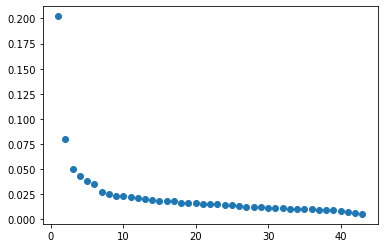

In [4]:
# Factor analysis to reduce the feature dimenson
from sklearn.decomposition import PCA
x = df.iloc[:,range(5,len(df.columns))]
pca = PCA(n_components=0.99, random_state = 1234)
pca.fit(x)

print(pca.explained_variance_ratio_)
plt.scatter(x = range(1, pca.n_components_+1),
            y = pca.explained_variance_ratio_, marker='o')
plt.show()

In [5]:
pca = PCA(n_components=10, random_state = 1234)
pca.fit(x)
r = round(sum(pca.explained_variance_ratio_)*100,0)
print(str(pca.n_components_) + " components explain " + str(r) + "% variance.")

x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['com_' + str(i) for i in range(1,pca.n_components_+1)]

10 components explain 55.0% variance.


In [6]:
x_pca

,com_1,com_2,com_3,com_4,com_5,com_6,com_7,com_8,com_9,com_10
0,37.057199,-41.612911,22.482414,-29.000004,12.982119,-15.336519,2.553346,-0.155080,-2.219298,-19.303179
1,-26.464061,-15.934777,-9.972392,13.020054,21.047793,-5.048542,2.873451,16.218897,8.615099,2.528202
2,-20.841177,-21.403753,-1.915185,1.034653,-24.794739,56.414154,-6.844151,25.378871,-1.394911,-18.861100
3,12.606255,-18.940631,-32.526612,5.431275,-17.178913,15.095242,-3.236857,-26.310426,-10.317649,22.086033
4,-44.832942,15.485291,-12.185670,-8.408202,1.629221,0.276373,26.896470,-4.996207,12.299468,-2.977057
5,-40.881231,17.069863,-22.795636,-11.832549,-0.666794,-16.277702,-10.655040,-5.212656,-0.203464,-13.482662
6,-32.849712,27.735416,-19.007124,-20.878477,-4.287767,-6.293798,-11.386473,18.274840,-5.462077,13.690310
7,52.368608,39.598291,-10.066408,16.606540,3.946441,-10.484535,0.856683,4.019749,-1.455176,-18.293669
8,4.967841,-39.118626,-4.674114,44.365277,-18.252601,-22.405617,-11.397197,-6.531175,-17.604536,6.608718
9,-38.810769,7.057033,4.110890,6.631006,-15.144938,-2.016156,12.656003,-3.808292,-8.418274,-7.258437


## Step 2: Modeling

In [37]:
def knn_gridsearch_evaluate(X, y):
    knn = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 10),
                 'metric': ['euclidean','correlation','manhattan'],
                 'weights':['uniform', 'distance']}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv,
                          return_train_score=True, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr

The best performance from the leave-one-out cross-validation:
0.6756756756756757
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 9, 'weights': 'uniform'}
[[13  6]
 [ 6 12]]
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        19
         1.0       0.67      0.67      0.67        18

    accuracy                           0.68        37
   macro avg       0.68      0.68      0.68        37
weighted avg       0.68      0.68      0.68        37

0.6756756756756757


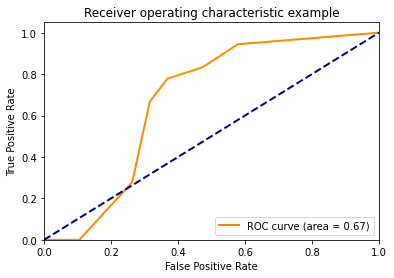

The best performance from the leave-one-out cross-validation:
0.7027027027027027
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 6, 'weights': 'distance'}
[[13  6]
 [ 5 13]]
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70        19
         1.0       0.68      0.72      0.70        18

    accuracy                           0.70        37
   macro avg       0.70      0.70      0.70        37
weighted avg       0.70      0.70      0.70        37

0.7027027027027027


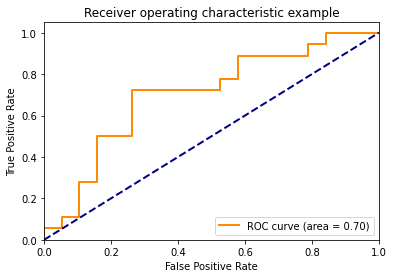

The best performance from the leave-one-out cross-validation:
0.8235294117647058
The parameters for the optimal model:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
[[14  3]
 [ 3 14]]
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        17
         1.0       0.82      0.82      0.82        17

    accuracy                           0.82        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.82      0.82      0.82        34

0.8235294117647058


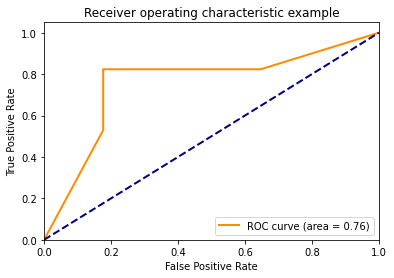

The best performance from the leave-one-out cross-validation:
0.7073170731707317
The parameters for the optimal model:
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
[[15  6]
 [ 6 14]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        21
         1.0       0.70      0.70      0.70        20

    accuracy                           0.71        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.71      0.71      0.71        41

0.7073170731707317


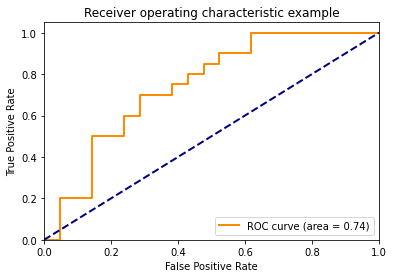

The best performance from the leave-one-out cross-validation:
0.5142857142857142
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 4, 'weights': 'distance'}
[[ 7 11]
 [ 6 11]]
              precision    recall  f1-score   support

         0.0       0.54      0.39      0.45        18
         1.0       0.50      0.65      0.56        17

    accuracy                           0.51        35
   macro avg       0.52      0.52      0.51        35
weighted avg       0.52      0.51      0.51        35

0.5142857142857142


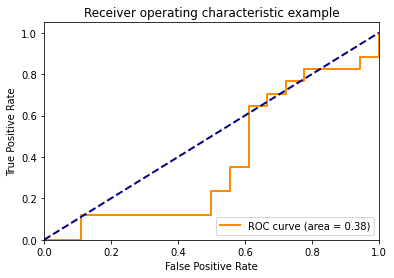

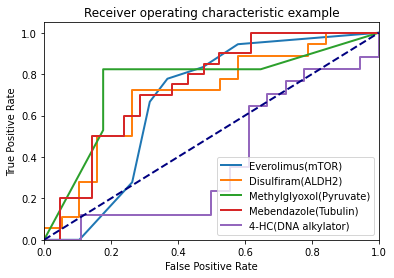

"\n    # Neural Network\n    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')\n    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')\n    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')\n    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')\n    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')\n"

<Figure size 432x288 with 0 Axes>

In [47]:
if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T

    x_pca.index = df_T.index
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = x_pca.loc[df_y1.index]
    df_X2 = x_pca.loc[df_y2.index]
    df_X3 = x_pca.loc[df_y3.index]
    df_X4 = x_pca.loc[df_y4.index]
    df_X5 = x_pca.loc[df_y5.index]

    # scaler = StandardScaler()
    # df_X1_zscore = scaler.fit_transform(df_X1)
    # df_X2_zscore = scaler.fit_transform(df_X2)
    # df_X3_zscore = scaler.fit_transform(df_X3)
    # df_X4_zscore = scaler.fit_transform(df_X4)
    # df_X5_zscore = scaler.fit_transform(df_X5)

    # KNN
    fpr1, tpr1 = knn_gridsearch_evaluate(df_X1.values, df_y1.values)
    fpr2, tpr2 = knn_gridsearch_evaluate(df_X2.values, df_y2.values)
    fpr3, tpr3 = knn_gridsearch_evaluate(df_X3.values, df_y3.values)
    fpr4, tpr4 = knn_gridsearch_evaluate(df_X4.values, df_y4.values)
    fpr5, tpr5 = knn_gridsearch_evaluate(df_X5.values, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1, tpr1,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2, tpr2,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3, tpr3,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4, tpr4,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5, tpr5,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc_all.png')
    

'''
    # Neural Network
    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')
    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')
    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')
    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')
    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')
'''

The best performance from the leave-one-out cross-validation:
0.5945945945945946
The parameters for the optimal model:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
[[15  4]
 [11  7]]
              precision    recall  f1-score   support

         0.0       0.58      0.79      0.67        19
         1.0       0.64      0.39      0.48        18

    accuracy                           0.59        37
   macro avg       0.61      0.59      0.57        37
weighted avg       0.61      0.59      0.58        37

0.5945945945945946


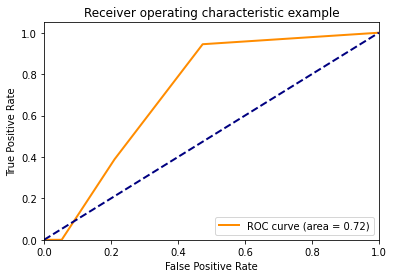

The best performance from the leave-one-out cross-validation:
0.6756756756756757
The parameters for the optimal model:
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
[[14  5]
 [ 7 11]]
              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70        19
         1.0       0.69      0.61      0.65        18

    accuracy                           0.68        37
   macro avg       0.68      0.67      0.67        37
weighted avg       0.68      0.68      0.67        37

0.6756756756756757


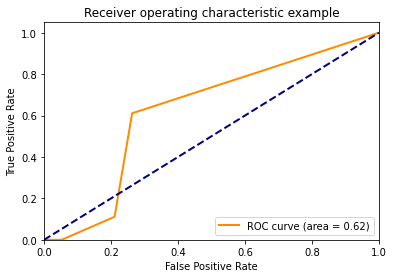

The best performance from the leave-one-out cross-validation:
0.7941176470588235
The parameters for the optimal model:
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
[[13  4]
 [ 3 14]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        17
         1.0       0.78      0.82      0.80        17

    accuracy                           0.79        34
   macro avg       0.80      0.79      0.79        34
weighted avg       0.80      0.79      0.79        34

0.7941176470588235


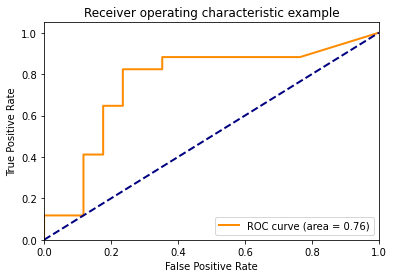

The best performance from the leave-one-out cross-validation:
0.7073170731707317
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 1, 'weights': 'uniform'}
[[14  7]
 [ 5 15]]
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70        21
         1.0       0.68      0.75      0.71        20

    accuracy                           0.71        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.71      0.71      0.71        41

0.7073170731707317


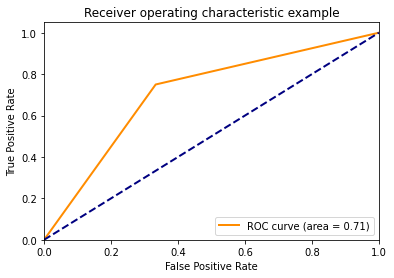

The best performance from the leave-one-out cross-validation:
0.5428571428571428
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 3, 'weights': 'uniform'}
[[10  8]
 [ 8  9]]
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56        18
         1.0       0.53      0.53      0.53        17

    accuracy                           0.54        35
   macro avg       0.54      0.54      0.54        35
weighted avg       0.54      0.54      0.54        35

0.5428571428571428


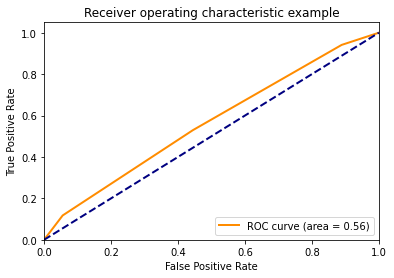

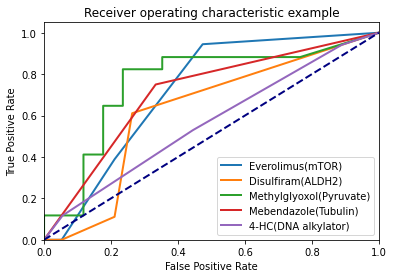

"\n    # Neural Network\n    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')\n    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')\n    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')\n    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')\n    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')\n"

<Figure size 432x288 with 0 Axes>

In [48]:
# Using 10 features after PCA
if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T

    x_pca.index = df_T.index
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = x_pca.loc[df_y1.index]
    df_X2 = x_pca.loc[df_y2.index]
    df_X3 = x_pca.loc[df_y3.index]
    df_X4 = x_pca.loc[df_y4.index]
    df_X5 = x_pca.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # KNN
    fpr1, tpr1 = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2, tpr2 = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3, tpr3 = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4, tpr4 = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5, tpr5 = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1, tpr1,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2, tpr2,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3, tpr3,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4, tpr4,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5, tpr5,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc_all_z.png')
    

'''
    # Neural Network
    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')
    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')
    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')
    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')
    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')
'''

In [8]:
# Neural network
def neural_net_evaluate(X, y):
    mlp = MLPClassifier(solver='adam')
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'hidden_layer_sizes': [(100,100,100)],
                 'alpha': [0.1, 1, 10],
                 'batch_size': [8, 16, 32]}
    
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    mlp_gscv = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv,
                           n_jobs=-1) # Turn on cv train scores
    # fit model to data
    mlp_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(mlp_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(mlp_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    mlp_best = mlp_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        mlp_best.fit(X_train, y_train)
        y_pred = mlp_best.predict(X_test)
        y_score = mlp_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig(figname)
    
    return fpr, tpr

The best performance from the leave-one-out cross-validation:
0.5135135135135135
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 32, 'hidden_layer_sizes': (100, 100, 100)}
[[ 9 10]
 [ 8 10]]
              precision    recall  f1-score   support

         0.0       0.53      0.47      0.50        19
         1.0       0.50      0.56      0.53        18

    accuracy                           0.51        37
   macro avg       0.51      0.51      0.51        37
weighted avg       0.52      0.51      0.51        37

0.5135135135135135


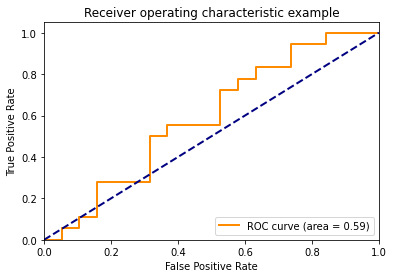

The best performance from the leave-one-out cross-validation:
0.5675675675675675
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}
[[11  8]
 [ 8 10]]
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58        19
         1.0       0.56      0.56      0.56        18

    accuracy                           0.57        37
   macro avg       0.57      0.57      0.57        37
weighted avg       0.57      0.57      0.57        37

0.5675675675675675


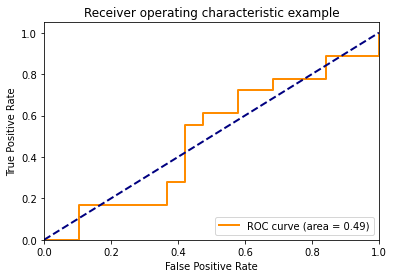

The best performance from the leave-one-out cross-validation:
0.7352941176470589
The parameters for the optimal model:
{'alpha': 1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}
[[13  4]
 [ 5 12]]
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74        17
         1.0       0.75      0.71      0.73        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.74        34
weighted avg       0.74      0.74      0.74        34

0.7352941176470589


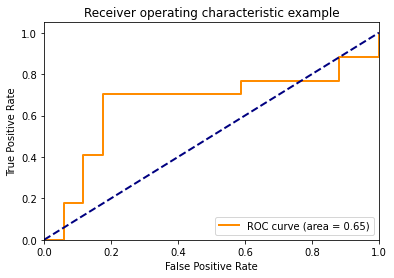

The best performance from the leave-one-out cross-validation:
0.7317073170731707
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 16, 'hidden_layer_sizes': (100, 100, 100)}
[[13  8]
 [ 4 16]]
              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68        21
         1.0       0.67      0.80      0.73        20

    accuracy                           0.71        41
   macro avg       0.72      0.71      0.71        41
weighted avg       0.72      0.71      0.71        41

0.7073170731707317


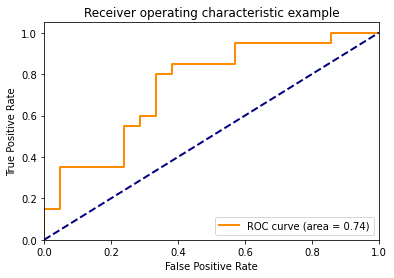

The best performance from the leave-one-out cross-validation:
0.45714285714285713
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}
[[ 9  9]
 [11  6]]
              precision    recall  f1-score   support

         0.0       0.45      0.50      0.47        18
         1.0       0.40      0.35      0.38        17

    accuracy                           0.43        35
   macro avg       0.43      0.43      0.42        35
weighted avg       0.43      0.43      0.43        35

0.42857142857142855


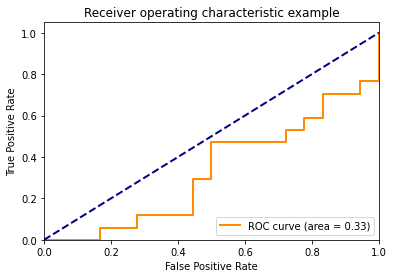

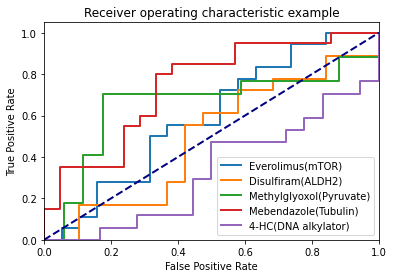

"\n    # Neural Network\n    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')\n    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')\n    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')\n    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')\n    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')\n"

<Figure size 432x288 with 0 Axes>

In [11]:
# Using 10 features after PCA - not necessary, and it indeed performs worse
if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T

    x_pca.index = df_T.index
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = x_pca.loc[df_y1.index]
    df_X2 = x_pca.loc[df_y2.index]
    df_X3 = x_pca.loc[df_y3.index]
    df_X4 = x_pca.loc[df_y4.index]
    df_X5 = x_pca.loc[df_y5.index]

    # scaler = StandardScaler()
    # df_X1_zscore = scaler.fit_transform(df_X1)
    # df_X2_zscore = scaler.fit_transform(df_X2)
    # df_X3_zscore = scaler.fit_transform(df_X3)
    # df_X4_zscore = scaler.fit_transform(df_X4)
    # df_X5_zscore = scaler.fit_transform(df_X5)

    # KNN
    fpr1, tpr1 = neural_net_evaluate(df_X1.values, df_y1.values)
    fpr2, tpr2 = neural_net_evaluate(df_X2.values, df_y2.values)
    fpr3, tpr3 = neural_net_evaluate(df_X3.values, df_y3.values)
    fpr4, tpr4 = neural_net_evaluate(df_X4.values, df_y4.values)
    fpr5, tpr5 = neural_net_evaluate(df_X5.values, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1, tpr1,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2, tpr2,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3, tpr3,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4, tpr4,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5, tpr5,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc_all_z.png')
    

'''
    # Neural Network
    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')
    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')
    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')
    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')
    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')
'''